大户空仓账户数与价格相关性系数： 0.17194403627391247


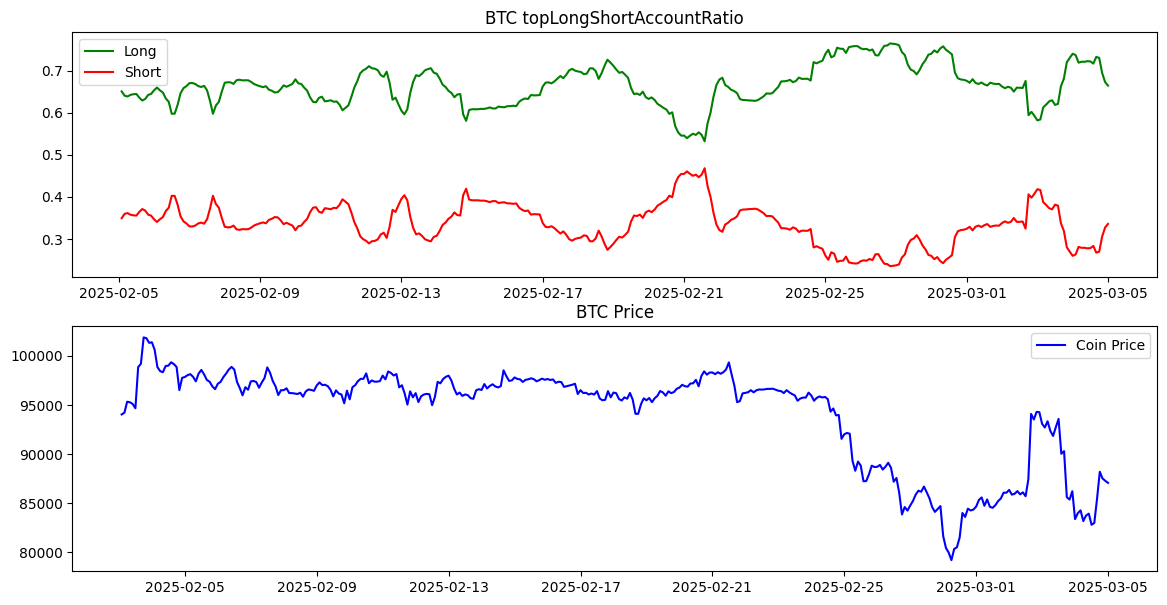

In [1]:
import pandas as pd
import requests
import requests
# 3.9.2版本
import matplotlib.pyplot as plt

proxies = {
  'http': 'http://127.0.0.1:7890',
  'https': 'http://127.0.0.1:7890',
}

# SYMBOL='TROY'
# SYMBOL='1000000MOGUSDT'
SYMBOL = 'BTC'
INTERVAL='2h'
LIMIT=30*4*3

# 币安合约主动买卖量
FOUNDRATE_URL=f'https://fapi.binance.com/futures/data/topLongShortAccountRatio?symbol={SYMBOL}USDT&period={INTERVAL}&limit={LIMIT}'
BINANCE_PRICE_URL = f'https://api.binance.com/api/v3/klines?interval={INTERVAL}&limit={LIMIT}&symbol={SYMBOL}USDT'

def fetch_data(url):
    response = requests.get(url, proxies=proxies)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f'Error fetching data: {response.status_code}')
        return None

# 主程序
# if __name__ == '__main__':
# 获取 Binance 数据
data = fetch_data(FOUNDRATE_URL)
klines = fetch_data(BINANCE_PRICE_URL)
df = pd.DataFrame(data)
df_klines = pd.DataFrame(klines)

df_klines.rename(columns={0: 'timestamp', 4: 'closePrice'}, inplace=True)
df_klines['timestamp'] = pd.to_datetime(df_klines['timestamp'], unit='ms')
df_klines['closePrice'] = df_klines['closePrice'].astype(float)
# 多仓人数比例
df['longAccount_shift'] = df['longAccount'].astype(float)
# 空仓人数比例
df['shortAccount_shift'] = df['shortAccount'].astype(float)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

corr = df_klines['closePrice'].corr(df['longAccount_shift'])
corr2 = df_klines['closePrice'].corr(df['shortAccount_shift'])

print("大户空仓账户数与价格相关性系数：", corr2)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['longAccount_shift'], label='Long', color='green')
plt.plot(df['timestamp'], df['shortAccount_shift'], label='Short', color='red')
plt.title(f'{SYMBOL} topLongShortAccountRatio')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df_klines['timestamp'], df_klines['closePrice'], label='Coin Price', color='blue')
plt.title(f'{SYMBOL} Price')
plt.legend()
plt.show()

In [2]:
import pandas as pd
import requests
import requests
# 3.9.2版本
import matplotlib.pyplot as plt

proxies = {
  'http': 'http://127.0.0.1:7890',
  'https': 'http://127.0.0.1:7890',
}

SYMBOL='BTC'
INTERVAL='1m'
LIMIT=24*4*3

# 币安大户账户比
FOUNDRATE_URL=f'https://fapi.binance.com/futures/data/topLongShortAccountRatio?symbol={SYMBOL}USDT&period={INTERVAL}&limit={LIMIT}'
BINANCE_PRICE_URL = f'https://api.binance.com/api/v3/klines?interval={INTERVAL}&limit={LIMIT}&symbol={SYMBOL}USDT'

def fetch_data(url):
    response = requests.get(url, proxies=proxies)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f'Error fetching data: {response.status_code}')
        return None

# 主程序
# if __name__ == '__main__':
# 获取 Binance 数据
data = fetch_data(FOUNDRATE_URL)
klines = fetch_data(BINANCE_PRICE_URL)
df = pd.DataFrame(data)
df_klines = pd.DataFrame(klines)

# 列的1为timestamp，4为closePrice，请修改列名称
df_klines.rename(columns={0: 'timestamp', 4: 'closePrice'}, inplace=True)
df_klines['timestamp'] = pd.to_datetime(df_klines['timestamp'], unit='ms')
df_klines['closePrice'] = df_klines['closePrice'].astype(float)
# 多仓账户比例
df['longAccount_shift'] = df['longAccount'].astype(float)
# 空仓账户比例
df['shortAccount_shift'] = df['shortAccount'].astype(float)
df['longShortRatio_shift'] = df['longShortRatio'].shift(1)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

corr = df_klines['closePrice'].corr(df['longAccount_shift'])
corr2 = df_klines['closePrice'].corr(df['shortAccount_shift'])
# corr3 = df_klines['closePrice'].corr(df['longShortRatio_shift'])

print("大户多仓账户数与价格相关性系数：", corr)
print("大户空仓账户数与价格相关性系数：", corr2)
# print("大户多空仓账户数比值与未来价格相关性系数：", corr3)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['longAccount_shift'], label='Long', color='green')
plt.plot(df['timestamp'], df['shortAccount_shift'], label='Short', color='red')
plt.title(f'{SYMBOL} Top 20% Accounts on long and short')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df_klines['timestamp'], df_klines['closePrice'], label='Coin Price', color='blue')
plt.title(f'{SYMBOL} Price')
plt.legend()
plt.show()

KeyError: 'longAccount'